FFR120: Homework 2 by Richard Blücher

Exercise 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt 


In [2]:
# Initialize
kB = 1.380 * 10**(-23) # Boltzman constant
T = 300 # Absolute temperature
eta = 10**(-3) # Viscosity η
R = 10**(-6) # Radius
kx = 10**(-6) # Stiffness x
ky = 9 * 10**(-6) # Stiffness y

gamma = 6 * np.pi * eta * R # Friction coefficient γ
D = kB * T / gamma

t_tot = 30



In [3]:
tao_trap_x = gamma/kx # Characteristic relaxation time
tao_trap_y = gamma/ky

print(f'tao_trap_x = {tao_trap_x:.4}')
print(f'tao_trap_y = {tao_trap_y:.4}')

print(f'dt should be << {min(tao_trap_x, tao_trap_y):.4}')

dt = 0.05 * min(tao_trap_x, tao_trap_y) 

print(f'Q1: dt is chosen to be {dt:.4}.')
print(f'Motovation: this gives t/tao = {dt/min(tao_trap_x, tao_trap_y)} which is approx. what is used in the optical tweezer example from the book.')

tao_trap_x = 0.01885
tao_trap_y = 0.002094
dt should be << 0.002094
Q1: dt is chosen to be 0.0001047.
Motovation: this gives t/tao = 0.05 which is approx. what is used in the optical tweezer example from the book.


In [4]:
N = int(t_tot/dt) # Total steps in simulation


In [5]:
x = np.zeros(N)    # Initiated trajectory array x
y = np.zeros(N)    # Initiated trajectory array y
Wx=np.random.randn(N)  # Gaussian distributed random numbers 
Wy=np.random.randn(N)  # Gaussian distributed random numbers

for i in range(N-1):
    x[i+1] = x[i] - kx*x[i]*dt/gamma + np.sqrt(2*kB*T*dt/gamma)*Wx[i]      # Overdamped Langevin equation x
    y[i+1] = y[i] - ky*y[i]*dt/gamma + np.sqrt(2*kB*T*dt/gamma)*Wy[i]      # Overdamped Langevin equation y

Text(0.5, 1.0, 'P1: Trajectory of the disc in the Cartesian plane')

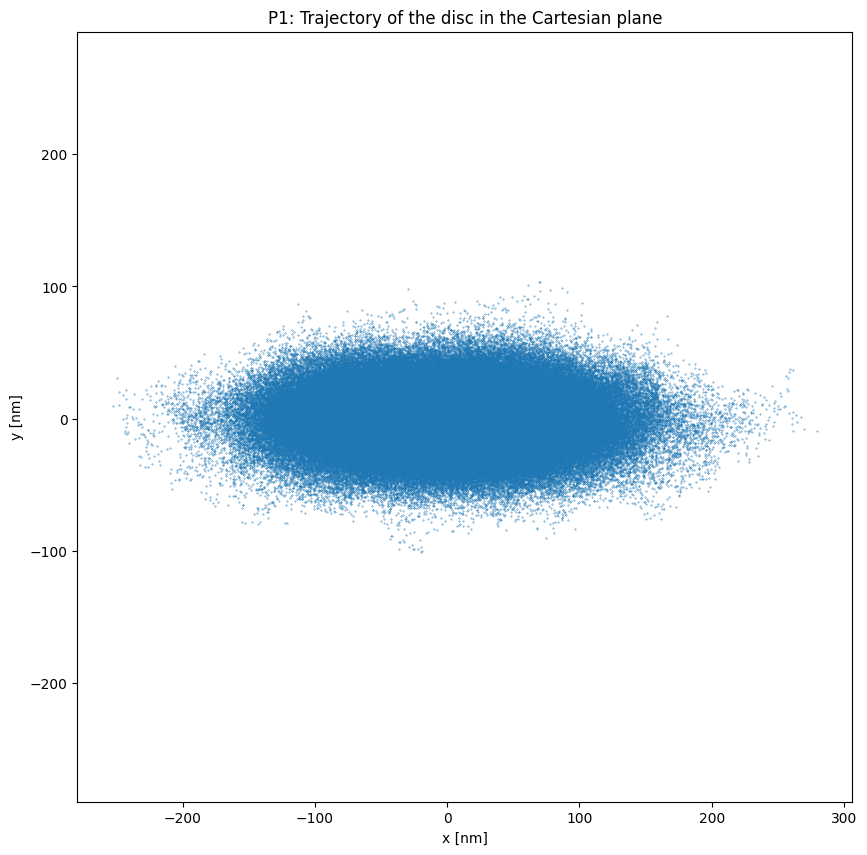

In [6]:
### Plotting the 2D trajectory 

plt.figure(figsize=(10,10))
plt.plot(x*1e9,y*1e9,'.',markersize=0.6) # *1e9 for m->nm
plt.axis('equal')

plt.xlabel('x [nm]')
plt.ylabel('y [nm]')
plt.title('P1: Trajectory of the disc in the Cartesian plane')

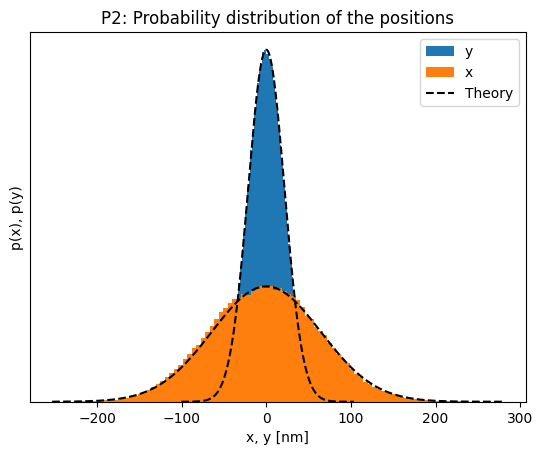

In [7]:
x_space = np.linspace(min(x), max(x), 1000)
y_space = np.linspace(min(y), max(y), 1000)

# Theorethical probability dist
px = np.exp(-1/(2* kB * T) * kx * x_space**2)
py = np.exp(-1/(2* kB * T) * ky * y_space**2)

# Histogram
n_y = plt.hist(y*1e9, 100, label = 'y', density=True) 
n_x = plt.hist(x*1e9, 100, label = 'x', density=True)


plt.plot(x_space*1e9, px*max(n_x[0]), 'k--', label='Theory')
plt.plot(y_space*1e9, py*max(n_y[0]), 'k--')


plt.yticks([], [])
plt.xlabel('x, y [nm]')
plt.ylabel('p(x), p(y)')
plt.title('P2: Probability distribution of the positions')
plt.legend()


In [8]:
# Compute variance
var_x = np.var(x)
var_y = np.var(y)

# Theorethical variance
var_x_the = kB*T/kx
var_y_the = kB*T/ky

print('Q2:')
print(f'The calculated variance for x is {var_x:.4}, compare to theoretical {var_x_the:.4}. Computed differs {abs(var_x-var_x_the)*100/var_x_the:.2}% from theoretical.')
print(f'The calculated variance for y is {var_y:.4}, compare to theoretical {var_y_the:.4}. Computed differs {abs(var_y-var_y_the)*100/var_y_the:.2}% from theoretical.')
print(f'The variance is bigger for x ({var_x:.4} > {var_y:.4}) which is evident in the plot above.')

Q2:
The calculated variance for x is 4.107e-15, compare to theoretical 4.14e-15. Computed differs 0.79% from theoretical.
The calculated variance for y is 4.745e-16, compare to theoretical 4.6e-16. Computed differs 3.1% from theoretical.
The variance is bigger for x (4.107e-15 > 4.745e-16) which is evident in the plot above.


In [9]:
# Compute position autocorrelation C
Cx = np.zeros(N)
Cy = np.zeros(N)
for n in range(N):
    Cx[n] = 1/(N-n) * np.sum(x[n+1:N]*x[1:N-n])
    Cy[n] = 1/(N-n) * np.sum(y[n+1:N]*y[1:N-n])



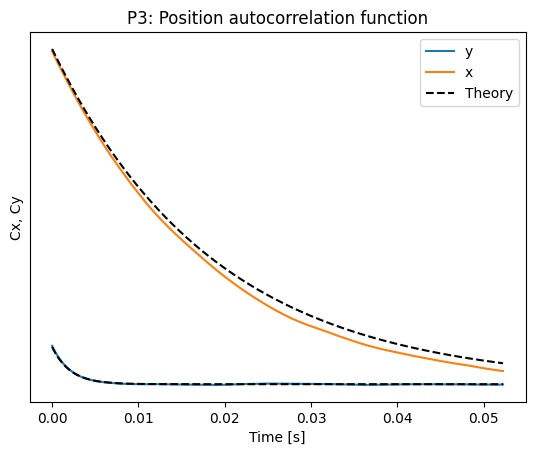

In [10]:
time_space = np.linspace(0, t_tot, len(Cx))

# Theorethical position autocorrelation C
Cx_the = kB*T/kx * np.exp(-kx*time_space/gamma)
Cy_the = kB*T/ky * np.exp(-ky*time_space/gamma)



# Plot only first 500 itr bc rest is around 0
plt.plot(time_space[:500], Cy[:500], label = 'y')
plt.plot(time_space[:500], Cx[:500], label = 'x')


plt.plot(time_space[:500], Cy_the[:500], 'k--')
plt.plot(time_space[:500], Cx_the[:500], 'k--', label = 'Theory')

plt.yticks([], [])
plt.xlabel('Time [s]')
plt.ylabel('Cx, Cy')
plt.title('P3: Position autocorrelation function')
plt.legend()


Exercise 2

In [11]:
def regularize(x,t,T):
    m = np.diff(x)/np.diff(t)                             # Slopes of the different increments 
    t_r = np.arange(T)                                    # Regular times
    x_r = np.zeros(len(t_r))                              # Regularized position array 
    s = 0                                                 # Section number
    for i in range(len(t)-1):
        f = np.where(t_r < t[i+1])[0][-1]                 # Find the end of the segment that the values are to be assigned
        x_r[s:f+1] = x[i] + m[i] * (t_r[s:f+1]-t[i])      # Assign the values of the segment
        s = f+1                                           # Assign the beginning of the next segment 
    return(x_r)

def LW(T,alpha):
    import numpy as np
    x = []
    t = []
    x.append(0)
    t.append(0)
    V = 1
    while t[-1]<T:
        dt = (1-np.random.rand())**(-1/(3-alpha))          # Flight time distribution
        t.append(t[-1] + dt)
        x.append(x[-1] + V*np.random.choice([-1,1])*dt)    # Particle moves either right or left during flight
    x = regularize(x,t,T)
    return(x)

def LW_2D(T,alpha):
    import numpy as np
    t = []
    x = []
    y = []
    x.append(0)
    y.append(0)
    t.append(0)
    V = 1
    while t[-1]<T:
        dt = (1-np.random.rand())**(-1/(3-alpha))          # Flight time distribution
        t.append(t[-1] + dt)
        theta = np.random.rand()*2*np.pi
        x.append(x[-1] + V*np.cos(theta)*dt)               # Particle moves randomly in 2D
        y.append(y[-1] + V*np.sin(theta)*dt)               # Particle moves randomly in 2D
    x = regularize(x,t,T)
    y = regularize(y,t,T)
    return(x,y)

Text(0.5, 1.0, 'P1: LW trajectories in one dimension for α = 2, v = 1')

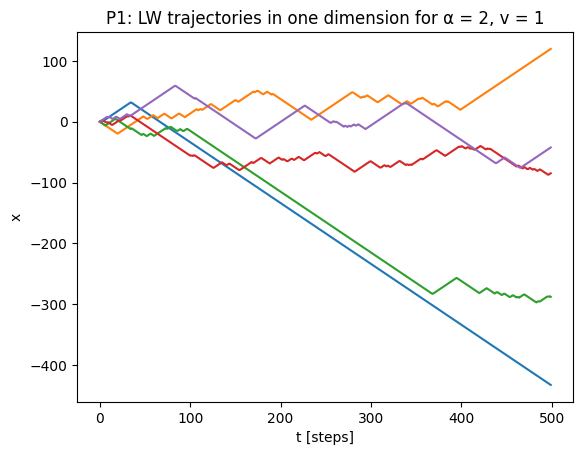

In [12]:
alpha = 2
T = 500
nr_of_walks = 5
# One dimension
walks_1d = np.zeros([nr_of_walks, T])

for i in range(nr_of_walks):
    walks_1d[i] = LW(T, alpha)
    plt.plot(walks_1d[i])

plt.xlabel('t [steps]')
plt.ylabel('x')
plt.title('P1: LW trajectories in one dimension for α = 2, v = 1')

Text(0.5, 1.0, 'P2: LW trajectories in two dimensions for α = 2, v = 1')

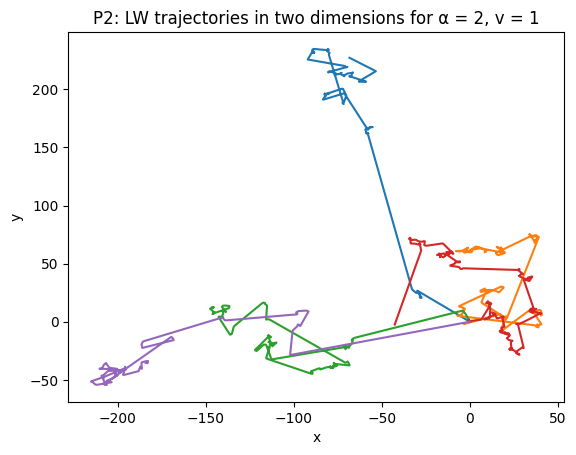

In [13]:
# Two dimensions
walks_2d = np.zeros([nr_of_walks, 2, T])

for i in range(nr_of_walks):
    walks_2d[i] = LW_2D(T, alpha)
    plt.plot(walks_2d[i, 0], walks_2d[i, 1])

plt.xlabel('x')
plt.ylabel('y')
plt.title('P2: LW trajectories in two dimensions for α = 2, v = 1')

In [14]:
def tMSD_1d(x, L):
    """
    Function to calculate the tMSD.
    
    Parameters
    ==========
    x : Trajectory (x component).
    L : Indicates the maximum delay (L * dt) considered.
    """

    tmsd = np.zeros(L)
    
    nelem = np.size(x)

    for n in range(L):
        Nmax = nelem - n
        dx = x[n:nelem] -  x[0: Nmax]
        tmsd[n] += np.mean(dx ** 2)

    return tmsd

def eMSD_1d(x):
    """
    Function to calculate the eMSD.
    
    Parameters
    ==========
    x : Trajectories: x[n_traj, i], bidimensional array.
    """

    N_traj, N_steps = x.shape
    
    # emsd = np.zeros(N_steps)
    
    emsd = np.mean(
        (x - np.repeat(x[:, 0].reshape(N_traj, 1), N_steps, axis=1)) ** 2,
        axis=0
    )
    
    return emsd

In [15]:
T = 200
# eMSD
nr_of_walks = 1000
walks_1d = np.zeros([nr_of_walks, T])

for i in range(nr_of_walks):
    walks_1d[i] = LW(T, alpha)

emsd = eMSD_1d(walks_1d)



In [16]:
# tMSD
T_long = T * nr_of_walks # To have equal samples
long_walk_1d = LW(T_long, alpha)
tmsd = tMSD_1d(long_walk_1d, T)



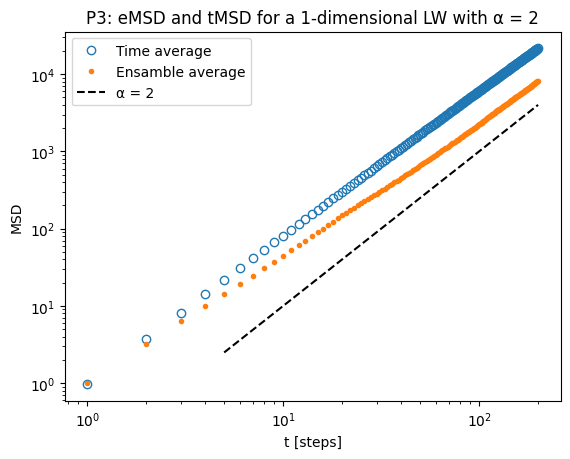

In [17]:
plt.loglog(tmsd, 'o', fillstyle = 'none', label = 'Time average')
plt.loglog(emsd, '.', label = 'Ensamble average')

# For comparasion
t_space = np.linspace(5, T)
time_sq = 0.1*t_space**2
plt.loglog(t_space, time_sq, 'k--', label = 'α = 2')

plt.xlabel('t [steps]')
plt.ylabel('MSD')
plt.title('P3: eMSD and tMSD for a 1-dimensional LW with α = 2')
plt.legend()



Exercise 3

In [18]:
alpha = 1

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 4, 16, 64])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

sigma0 = 1
dsigma = 1.8
dsigma_dx = dsigma / L

w0 = 25

Text(0.5, 1.0, 'P1: Dependence for the term s(x)')

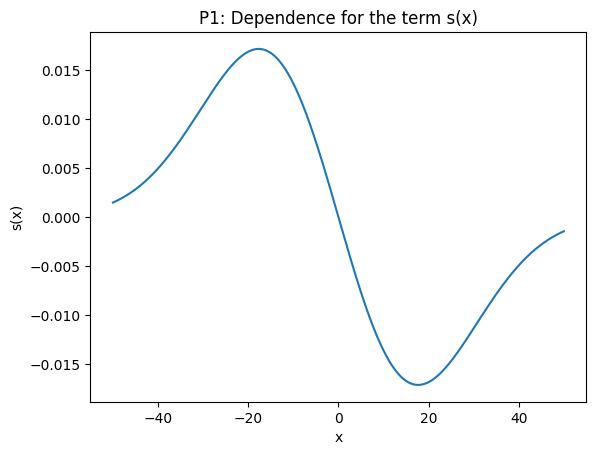

In [19]:
# s(x)
x_space = np.linspace(x_min, x_max, 1000)

s = - x_space * (sigma0/w0)**2 * np.exp(-x_space**2/w0**2)

plt.plot(x_space, s)
plt.xlabel('x')
plt.ylabel('s(x)')
plt.title('P1: Dependence for the term s(x)')


In [20]:
alpha = 0

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 5, 10, 25, 50, 100])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

sigma0 = 1



x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 * np.exp(- x**2/(2*w0**2))  # Multiplicative noise.
        dsigma_dx = - sigma0 * x / (w0**2 * np.sqrt(np.exp(x**2/w0**2)))
        dx_spurious = alpha * sigma_x * dsigma_dx * dt
        x += dx_spurious + sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x

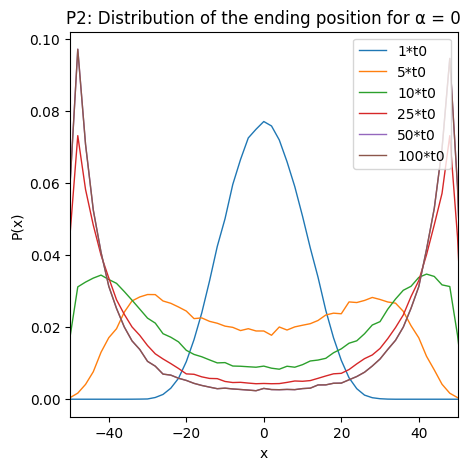

In [21]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=f'{j_mult[j]}*t0')
plt.title('P2: Distribution of the ending position for α = 0')
plt.legend(loc = 'upper right')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()

In [22]:
alpha = 0.5

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 5, 10, 25, 50, 100])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

sigma0 = 1



x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 * np.exp(- x**2/(2*w0**2))  # Multiplicative noise.
        dsigma_dx = - sigma0 * x / (w0**2 * np.sqrt(np.exp(x**2/w0**2))) # Derivative
        dx_spurious = alpha * sigma_x * dsigma_dx * dt
        x += dx_spurious + sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x

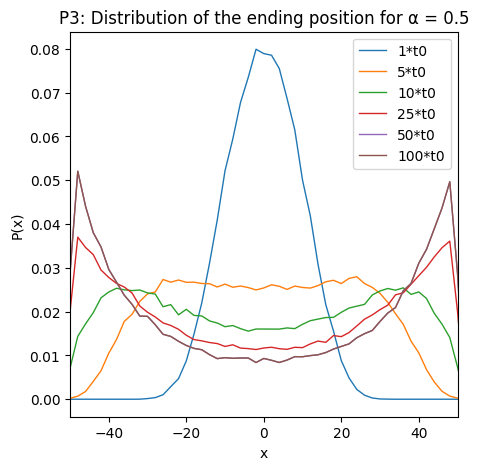

In [23]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=f'{j_mult[j]}*t0')
plt.title('P3: Distribution of the ending position for α = 0.5')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()

In [24]:
alpha = 1

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 5, 10, 25, 50, 100])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

sigma0 = 1



x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 * np.exp(- x**2/(2*w0**2))  # Multiplicative noise.
        dsigma_dx = - sigma0 * x / (w0**2 * np.sqrt(np.exp(x**2/w0**2)))
        dx_spurious = alpha * sigma_x * dsigma_dx * dt
        x += dx_spurious + sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x

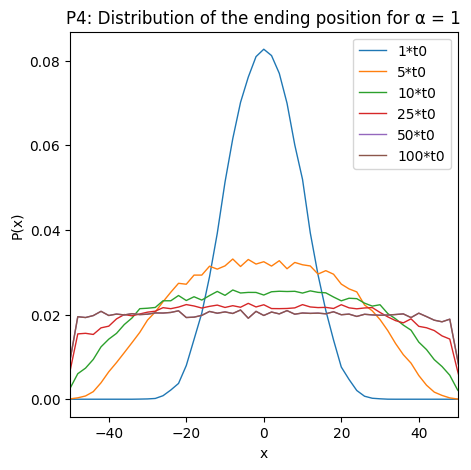

In [25]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=f'{j_mult[j]}*t0')
plt.title('P4: Distribution of the ending position for α = 1')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()

Text(0.5, 1.0, 'For Q1: Multiplicative noise')

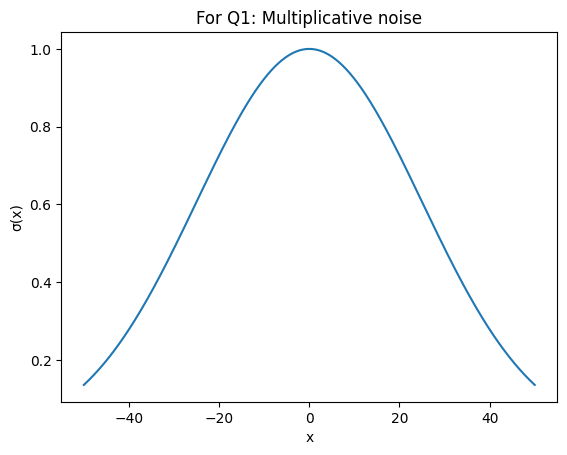

In [26]:
plt.plot(x_space, np.exp(-x_space**2/(2*w0**2)), label = 'σ(x)')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.title('For Q1: Multiplicative noise')


Q1: The distribution of the final points are symmetrical in all plots. When α = 0 the peaks are at both edges of the box, this is because σ(x) is lowest at these points (see plot above) which makes the differences in position between steps small making, the particle linger around these points longer. The plot for α = 0.5 is similar to the one for α = 0 but with lower peaks because half of the spurious drift is now added. When α = 1 and the system has evolved long enough, the distribution is uniform (symmetrical) because the full spurious drift is added. This uniform distribution is expected for a particle at thermodynamic equilibrium and not driven by any deterministic force. To summarize, the first two plots are symmetrical because σ(x) is symmetrical and the third is symmetrical because it should be according to physics.

Exercise 4

In [27]:
def replicas(x, y, L):
    """
    Function to generate replicas of a single particle.
    
    Parameters
    ==========
    x, y : Position.
    L : Side of the squared arena.
    """    
    xr = np.zeros(9)
    yr = np.zeros(9)

    for i in range(3):
        for j in range(3):
            xr[3 * i + j] = x + (j - 1) * L
            yr[3 * i + j] = y + (i - 1) * L
    
    return xr, yr

def pbc(x, y, L):
    """
    Function to enforce periodic boundary conditions on the positions.
    
    Parameters
    ==========
    x, y : Position.
    L : Side of the squared arena.
    """   
    
    outside_left = np.where(x < - L / 2)[0]
    x[outside_left] = x[outside_left] + L

    outside_right = np.where(x > L / 2)[0]
    x[outside_right] = x[outside_right] - L

    outside_up = np.where(y > L / 2)[0]
    y[outside_up] = y[outside_up] - L

    outside_down = np.where(y < - L / 2)[0]
    y[outside_down] = y[outside_down] + L
    
    return x, y

from functools import reduce

def interaction(x, y, theta, Rf, L):
    """
    Function to calculate the orientation at the next time step.
    
    Parameters
    ==========
    x, y : Positions.
    theta : Orientations.
    Rf : Flocking radius.
    L : Dimension of the squared arena.
    s : Discrete steps.
    """
    
    N = np.size(x)

    theta_next = np.zeros(N)
    
    # Preselect what particles are closer than Rf to the boundaries.
    replicas_needed = reduce( 
        np.union1d, (
            np.where(y + Rf > L / 2)[0], 
            np.where(y - Rf < - L / 2)[0],
            np.where(x + Rf > L / 2)[0],
            np.where(x - Rf > - L / 2)[0]
        )
    )

    for j in range(N):
        # Check if replicas are needed to find the nearest neighbours.
        if np.size(np.where(replicas_needed == j)[0]):
            # Use replicas.
            xr, yr = replicas(x[j], y[j], L)
            nn = []
            for nr in range(9):
                dist2 = (x - xr[nr]) ** 2 + (y - yr[nr]) ** 2 
                nn = np.union1d(nn, np.where(dist2 <= Rf ** 2)[0])
        else:
            dist2 = (x - x[j]) ** 2 + (y - y[j]) ** 2 
            nn = np.where(dist2 <= Rf ** 2)[0]
        
        # The list of nearest neighbours is set.
        nn = nn.astype(int)
        
        # Circular average.
        av_sin_theta = np.mean(np.sin(theta[nn]))
        av_cos_theta = np.mean(np.cos(theta[nn]))
        
        theta_next[j] = np.arctan2(av_sin_theta, av_cos_theta)
                   
    return theta_next

def global_alignment(theta):
    """
    Function to calculate the global alignment coefficient.
    
    Parameters
    ==========
    theta : Orientations.
    """
    
    N = np.size(theta)
    
    global_direction_x = np.sum(np.sin(theta))
    global_direction_y = np.sum(np.cos(theta))
        
    psi = np.sqrt(global_direction_x ** 2 + global_direction_y ** 2) / N
    
                   
    return psi

from scipy.spatial import Voronoi, voronoi_plot_2d

def area_polygon(vertices):
    """
    Function to calculate the area of a Voronoi region given its vertices.
    
    Parameters
    ==========
    vertices : Coordinates (array, 2 dimensional).
    """    
    
    N, dim = vertices.shape
    
    # dim is 2.
    # Vertices are listed consecutively.
    
    A = 0
    
    for i in range(N-1):
        # Below is the formula of the area of a triangle given the vertices.
        A += np.abs(
            vertices[- 1, 0] * (vertices[i, 1] - vertices[i + 1, 1]) +
            vertices[i, 0] * (vertices[i + 1, 1] - vertices[- 1, 1]) +
            vertices[i + 1, 0] * (vertices[- 1, 1] - vertices[i, 1])
        )
    
    A *= 0.5
    
    return A


def global_clustering(x, y, Rf, L):
    """
    Function to calculate the global alignment coefficient.
    
    Parameters
    ==========
    x, y : Positions.
    Rf : Flocking radius.
    L : Dimension of the squared arena.
    """
    
    N = np.size(x)
    
    # Use the replicas of all points to calculate Voronoi for 
    # a more precise estimate.
    points = np.zeros([9 * N, 2])

    for i in range(3):
        for j in range(3):
            s = 3 * i + j
            points[s * N:(s + 1) * N, 0] = x + (j - 1) * L
            points[s * N:(s + 1) * N, 1] = y + (i - 1) * L

    # The format of points is the one needed by Voronoi.
    # points[:, 0] contains the x coordinates
    # points[:, 1] contains the y coordinates
   
    vor = Voronoi(points)     
    '''
    vertices = vor.vertices  # Voronoi vertices.
    regions = vor.regions  # Region list. 
    # regions[i]: list of the vertices indices for region i.
    # If -1 is listed: the region is open (includes point at infinity).
    point_region = vor.point_region  # Region associated to input point.
    '''
   
    # Consider only regions of original set of points (no replicas).
    list_regions = vor.point_region[4 * N:5 * N]
    
    c = 0

    for i in list_regions:
        indices = vor.regions[i]
        # print(f'indices = {indices}')
        if len(indices) > 0:
            if np.size(np.where(np.array(indices) == -1)[0]) == 0:
                # Region is finite.
                # Calculate area.
                A = area_polygon(vor.vertices[indices,:])
                if A < np.pi * Rf ** 2:
                    c += 1
                    
    c = c / N
                   
    return c



Text(0.5, 0.98, 'P1: Configuration of the system at different t')

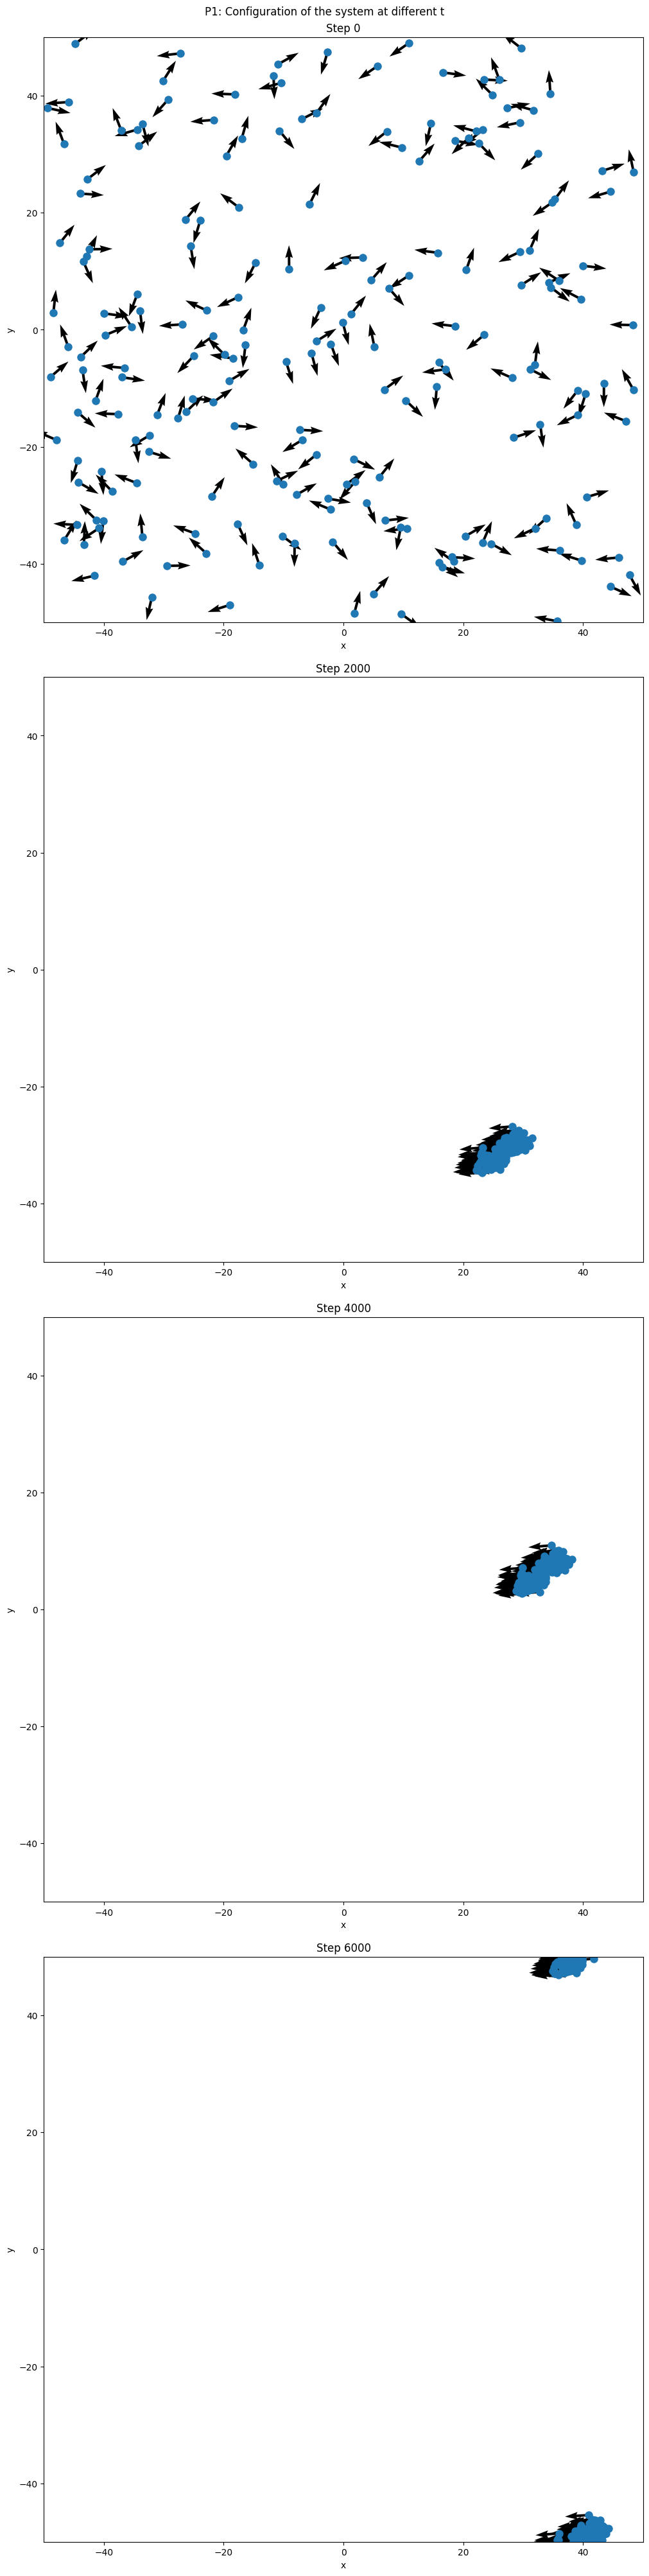

In [32]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import time

N_part = 200  # Number of particles.
L = 100  # Dimension of the squared arena.
v = 1  # Speed.
Rf = 2  # Flocking radius.
eta = 0.01  # Noise.  
dt = 1  # Time step.

N_max_steps = 6001

psi = np.zeros(N_max_steps)  # Records the global alignment.
c = np.zeros(N_max_steps)  # Records the global clustering.

# Initialization.

# Random position.
x = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]
y = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]

# Random orientation.
theta = 2 * (np.random.rand(N_part) - 0.5) * np.pi  # in [-pi, pi]

# Initialize plot.
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 40), layout='constrained')
i_fig = 0
for step in range(N_max_steps):
    # Check whether plot configuration.
    if step % 2000 == 0:
        #ax.clear()  # Clear previous plot.
        ax[i_fig].plot(x, y, '.', markersize=16)
        ax[i_fig].quiver(x, y, np.cos(theta), np.sin(theta))
        '''ax[i_fig].plot(Rf * np.cos(2 * np.pi * np.arange(360) / 360),
                Rf * np.sin(2 * np.pi * np.arange(360) / 360),
                '-', color='#FFA0FF', linewidth=3)'''
        ax[i_fig].set_xlim([-L / 2, L / 2])
        ax[i_fig].set_ylim([-L / 2, L / 2])
        ax[i_fig].set_title(f'Step {step}')
        ax[i_fig].set_xlabel('x')
        ax[i_fig].set_ylabel('y')
        #display(fig)  # Display updated plot.
        #clear_output(wait=True)  # Clear previous output.
        i_fig += 1
            
    psi[step] = global_alignment(theta)
    c[step] = global_clustering(x, y, Rf, L)
    
    # Calculate next theta from the rule.
    dtheta = eta * (np.random.rand(N_part) - 0.5) * dt
    theta = interaction(x, y, theta, Rf, L) + dtheta
    x = x + v * np.cos(theta)
    y = y + v * np.sin(theta)
    
    # Reflecting boundary conditions.
    x, y = pbc(x, y, L)
#display(fig)
fig.suptitle('P1: Configuration of the system at different t')


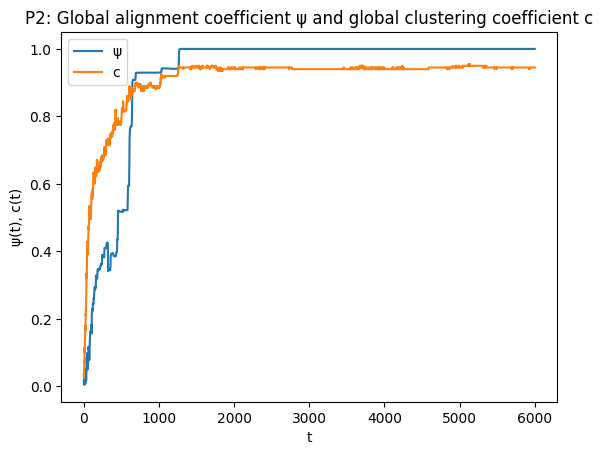

In [33]:
plt.plot(psi, label = 'ψ')
plt.plot(c, label = 'c')
plt.xlabel('t')
plt.ylabel('ψ(t), c(t)')
plt.title('P2: Global alignment coefficient ψ and global clustering coefficient c')
plt.legend()

Text(0.5, 0.98, 'P2: Configuration of the population with two distinct traits system at different t')

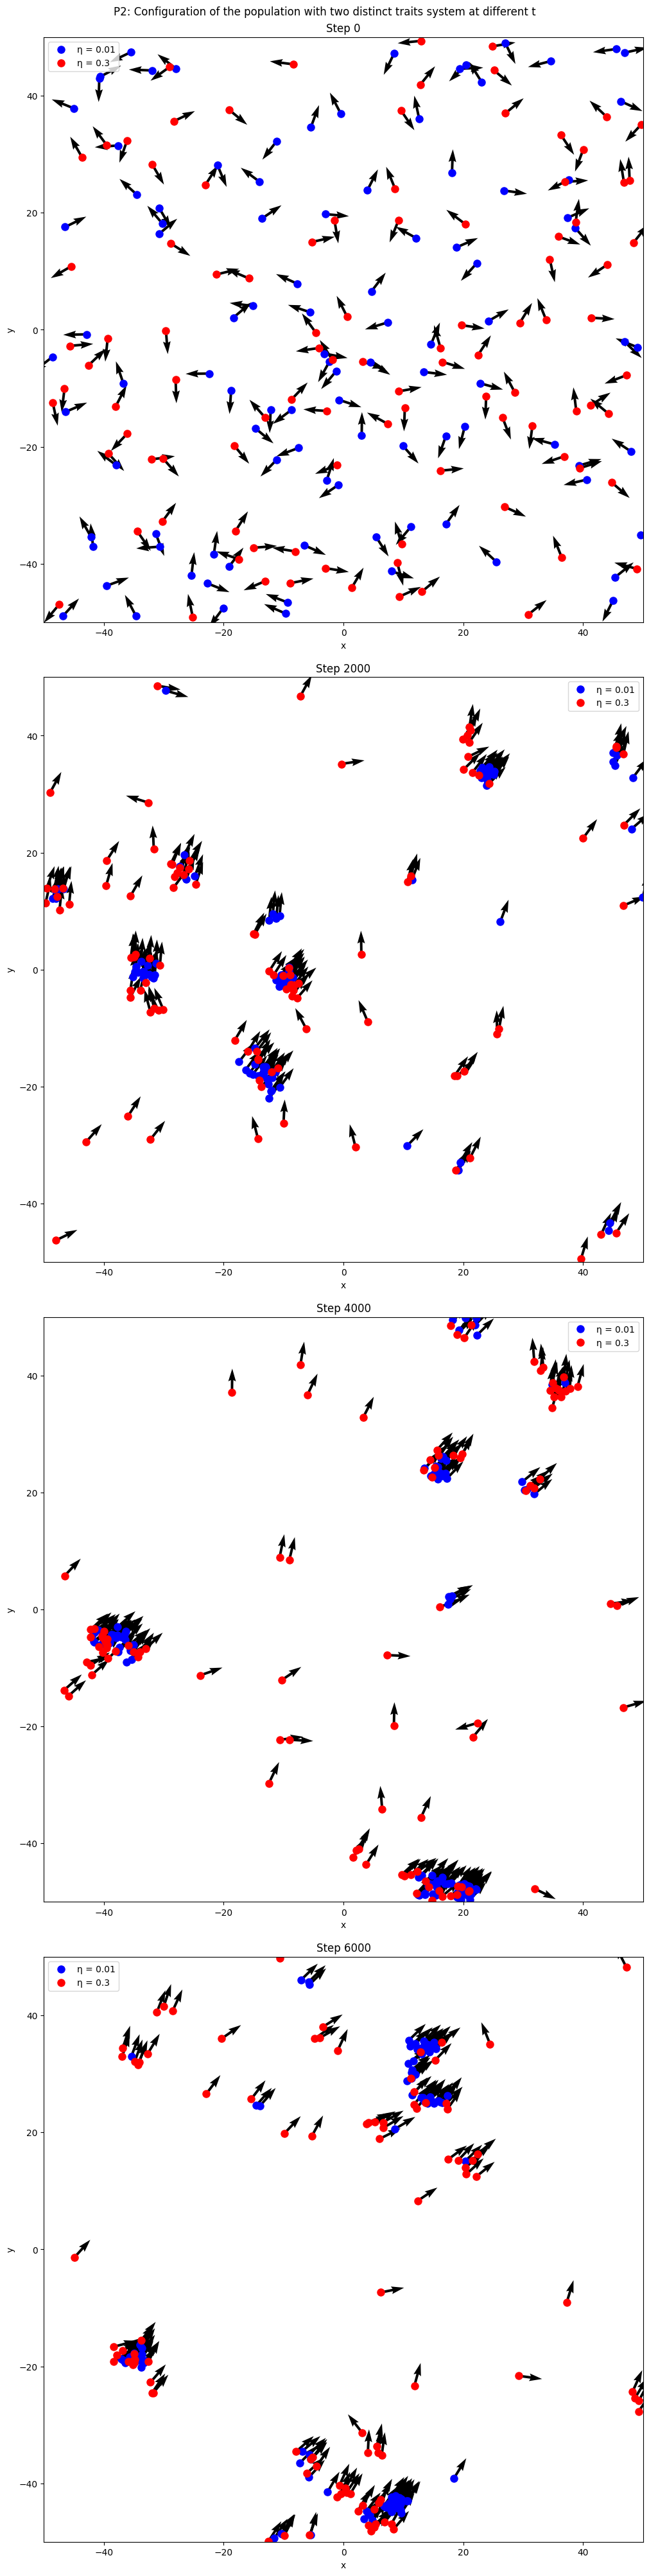

In [30]:
N_part = 200  # Number of particles.
N_half = int(N_part/2)
L = 100  # Dimension of the squared arena.
v = 1  # Speed.
Rf = 2  # Flocking radius.
eta1 = 0.01  # Noise.  
eta2 = 0.3 # Modified noise
dt = 1  # Time step.

N_max_steps = 6001

psi = np.zeros(N_max_steps)  # Records the global alignment.
c = np.zeros(N_max_steps)  # Records the global clustering.

# Initialization.

# Random position.
x = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]
y = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]

# Random orientation.
theta = 2 * (np.random.rand(N_part) - 0.5) * np.pi  # in [-pi, pi]

# Initialize plot.
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 40), layout='constrained')
i_fig = 0
for step in range(N_max_steps):
    # Check whether plot configuration.
    if step % 2000 == 0:
        #ax.clear()  # Clear previous plot.
        ax[i_fig].plot(x[N_half:], y[N_half:], 'b.', markersize=16, label = 'η = 0.01')
        ax[i_fig].plot(x[:N_half], y[:N_half], 'r.', markersize=16, label = 'η = 0.3')
        ax[i_fig].quiver(x, y, np.cos(theta), np.sin(theta))
        '''ax[i_fig].plot(Rf * np.cos(2 * np.pi * np.arange(360) / 360),
                Rf * np.sin(2 * np.pi * np.arange(360) / 360),
                '-', color='#FFA0FF', linewidth=3)'''
        ax[i_fig].set_xlim([-L / 2, L / 2])
        ax[i_fig].set_ylim([-L / 2, L / 2])
        ax[i_fig].set_title(f'Step {step}')
        ax[i_fig].set_xlabel('x')
        ax[i_fig].set_ylabel('y')
        ax[i_fig].legend()
        #display(fig)  # Display updated plot.
        #clear_output(wait=True)  # Clear previous output.
        i_fig += 1
            
    psi[step] = global_alignment(theta)
    c[step] = global_clustering(x, y, Rf, L)
    
    # Calculate next theta from the rule.
    dtheta1 = eta1 * (np.random.rand(N_half) - 0.5) * dt
    dtheta2 = eta2 * (np.random.rand(N_half) - 0.5) * dt
    theta = interaction(x, y, theta, Rf, L) #+ dtheta
    theta[N_half:] += dtheta1
    theta[:N_half] += dtheta2
    x = x + v * np.cos(theta)
    y = y + v * np.sin(theta)


    
    # Reflecting boundary conditions.
    x, y = pbc(x, y, L)
#display(fig)
fig.suptitle('P2: Configuration of the population with two distinct traits system at different t')


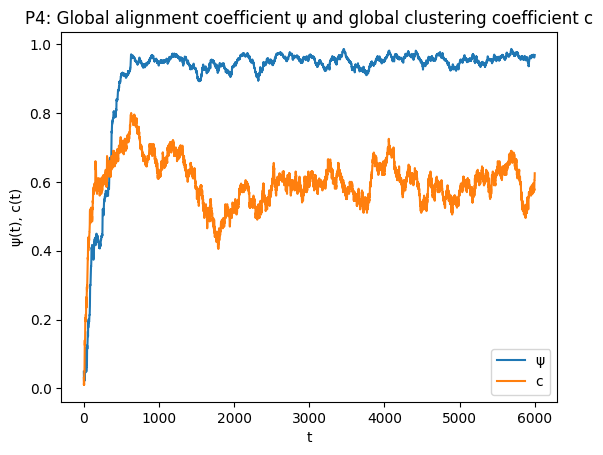

In [31]:
plt.plot(psi, label = 'ψ')
plt.plot(c, label = 'c')
plt.xlabel('t')
plt.ylabel('ψ(t), c(t)')
plt.title('P4: Global alignment coefficient ψ and global clustering coefficient c')
plt.legend()

Q1: With a population with two distinct traits they cluster much less and align a little less (especially the particles with η = 0.3) and the clusters break apart more (seen as the fluctuations in c(t)).